### Q1) Outlier Detection (20 Marks)

Outlier detection (also known as 'anomaly detection') is the process of finding observation points that deviate from other observations. Such observation points are called outliers or anomalies. In this question, you will employ simple visualization and statistical techniques to find the outliers and then, you will apply outlier detection algorithms.

You will be using customer_segmentation.csv dataset.

<strong>Note: You are required to submit the html files of both Q1 and Q2. Format should be q1_firsname_lastname_rollno.html</strong>

In [122]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans
from sklearn.neighbors import LocalOutlierFactor
from matplotlib import cm


### Loading the dataset

In [123]:
#loading the dataset
data_df = pd.read_csv("customer_segmentation.csv")
data_df.head(15)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [124]:
data = data_df.copy()
data = data.dropna()

### Outlier Visualization

### **Box-Plots**

Plot box-plots for "**Income**" and "**Card Debt**" attributes and comment on the results. 

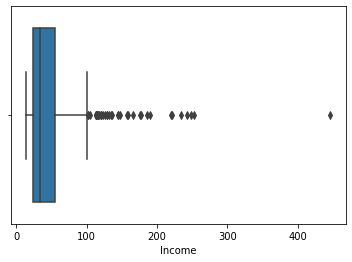

In [125]:
plot = sns.boxplot(x = data['Income'])

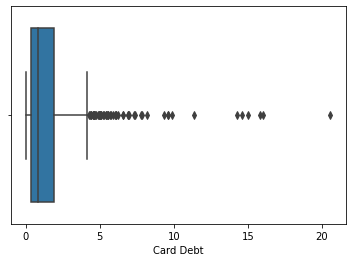

In [126]:
plot = sns.boxplot(x = data['Card Debt'])

Both Income and Card Debit have good amount outliers. Major reason is that their centres (medians) are towards too much Right side (away form center).

### **Scatter-plot**

Plot scatter-plot for **Income Vs DebtIncomeRatio**. Comment if it shows any outliers. Use matplotlib.pyplot library for scatter-plot.


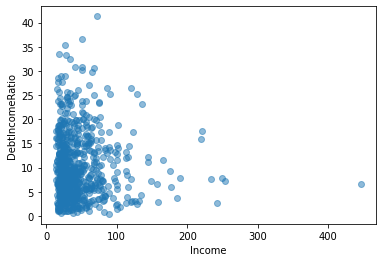

In [127]:
plt.scatter(data['Income'], data['DebtIncomeRatio'], alpha=0.5)
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')
plt.show()

I can observe one significant outlier in Age column (400>)

### Outlier Detection 

### **Z_score**

Z-score tells how many standard deviations is a certain data point away from the mean. For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their z-scores.

In [128]:
from scipy import stats
import numpy as np
 
z = np.abs(stats.zscore(data['Age']))
z1 = np.abs(stats.zscore(data['Other Debt']))
z2 = np.abs(stats.zscore(data['DebtIncomeRatio'])) 


* **What z-score threshold did you use to detect the outliers and why?**

In [129]:
threshold = 3
print(np.where(z > 3))
print(np.where(z > 2.7))
print(np.where(z1 > 3))
print(np.where(z2 > 3))


(array([], dtype=int64),)
(array([], dtype=int64),)
(array([ 17,  61,  63, 157, 253, 280, 286, 360, 366, 370, 409, 422, 437,
       464, 467], dtype=int64),)
(array([ 36, 409, 480, 486, 537, 678, 697], dtype=int64),)


I have set it to 3 becasue it will capture those points which are out of our 99% data range. Age has no significant outliers even at zscore of 2.7. While, Other_Debt adn DebtIncomeRation have some outliers.

### ***IQR***

For **Age,Other_Debt and DebtIncomeRatio**, output the list of values that are identified as outliers on the basis of their IQR values.

For this, calculate the first (q1) and third quartile (q3). An outlier is then a data point  that lies outside the interquartile range. That is:
*   *Lower outlier= Q1 - (k x IQR)*
*   *Higher outlier= Q3 + (k x IQR)*

Choose an appropriate 'k' for this part.

In [130]:
#Write code here
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
K = 1.5
low_lim = Q1 - K * IQR
up_lim = Q3 + K * IQR

In [131]:
age =[]
for x in data['Age']:
    if ((x> up_lim) or (x<low_lim)):
         age.append(x)
if age == []:
    print("no Outlier")
else:
    print(age)

no Outlier


In [132]:
#Write code here
Q11 = np.percentile(data['Other Debt'], 25, interpolation = 'midpoint')
Q31 = np.percentile(data['Other Debt'], 75, interpolation = 'midpoint')
IQR1 = Q31 - Q11
K1 = 1.5
low_lim1 = Q11 - K1 * IQR1
up_lim1 = Q31 + K1 * IQR1

In [133]:
Other_Debt =[]
for x in data['Other Debt']:
    if ((x> up_lim1) or (x<low_lim1)):
         Other_Debt.append(x)
if Other_Debt == []:
    print("no Outlier")
else:
    print(Other_Debt)

[8.908, 18.257, 10.184, 9.555, 9.459, 10.754, 14.453, 15.405, 11.874, 9.251, 12.076, 23.104, 8.6, 9.044, 9.737, 11.894, 20.616, 11.724, 11.042, 17.185, 13.051, 12.659, 9.591, 8.502, 15.149, 17.799, 18.269, 9.391, 12.714, 14.719, 17.204, 12.959, 8.399, 16.668, 27.034, 9.704, 9.716, 9.499, 11.663, 12.422, 10.98, 10.631, 9.975, 10.811, 9.198, 8.631, 9.286, 8.362]


In [134]:
#Write code here
Q12 = np.percentile(data['DebtIncomeRatio'], 25, interpolation = 'midpoint')
Q32 = np.percentile(data['DebtIncomeRatio'], 75, interpolation = 'midpoint')
IQR2 = Q32 - Q12
K2 = 1.5
low_lim2 = Q12 - K2 * IQR2
up_lim2 = Q32 + K2 * IQR2

In [135]:
DebtIncomeRatio =[]
for x in data['DebtIncomeRatio']:
    if ((x> up_lim2) or (x<low_lim2)):
         DebtIncomeRatio.append(x)
if DebtIncomeRatio == []:
    print("no Outlier")
else:
    print(DebtIncomeRatio)

[32.5, 29.7, 30.1, 28.9, 28.5, 30.7, 28.9, 41.3, 30.6, 35.3, 33.3, 36.6, 30.8, 33.4]


* **What k-value did you use to detect the outliers and why?**

I used 1.5 as it gives optimal results and used widely and it encapsultes 99% of data

* **Which parameter (IQR or Z-score) is better outlier detection? Give reason.**

z-score as it encapsulates all the individual standard deviations. 

### **Outlier Detection using LOC (Local Outlier Factor)**

LOF uses density-based outlier detection to identify local outliers. An anomaly score is assigned to each sample which measures the local deviation of density of a this sample with respect to its neighbors. 

In [136]:
#write your code here
data = data.drop('Address', axis = 1)
#data = data.drop('Defaulted', axis = 1)

**1.** Tranform the features by scaling them to a 
given range(e.g. 0-1):

In [137]:
from sklearn.preprocessing import MinMaxScaler
#Write your code here for minmax scaling
#Write your code here for minmax scaling
minMaxScaler = MinMaxScaler(feature_range=(0, 1))
data = minMaxScaler.fit_transform(data)
I = pd.DataFrame(data)
I.head()

,0,1,2,3,4,5,6,7,8
0,0.000000,0.583333,0.25,0.193548,0.011574,0.005450,0.038054,0.0,0.144254
1,0.001178,0.750000,0.00,0.838710,0.199074,0.222395,0.302801,0.0,0.303178
2,0.002356,0.361111,0.25,0.322581,0.099537,0.296803,0.213280,1.0,0.501222
3,0.003534,0.250000,0.25,0.129032,0.011574,0.032556,0.017415,0.0,0.144254
4,0.004711,0.750000,0.00,1.000000,0.553241,0.452382,0.328368,0.0,0.166259


**2.** Implement LOC algorithm using sklearn. Choose the parameters that will be passed into the function:

In [138]:
#write your code here
LocalOutlierFactor_ = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = LocalOutlierFactor_.fit_predict(X1)
labels = np.where(y_pred == -1, 0, y_pred)

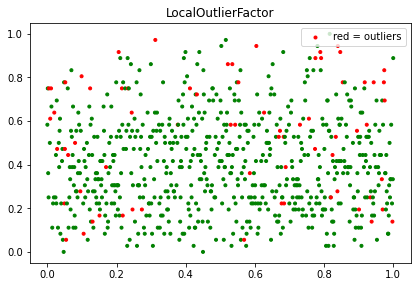

In [139]:
fig = plt.figure(figsize=(15,15))
def plot_model(labels, alg_name):
    ax = fig.add_subplot(3,2,1) 
    color_code = ['red','green']
    colors = [color_code[x] for x in labels]

    ax.scatter(X1.iloc[:,0], X1.iloc[:,1], color=colors, marker='.', label='red = outliers')
    ax.legend(loc="upper right")

    leg = plt.gca().get_legend()
    leg.legendHandles[0].set_color('red')

    ax.set_title(alg_name) 

plot_model(labels, 'LocalOutlierFactor')

* **What value did you use for the 'n_neighbours'?**

20 . approximation basead on #of rows : around 800

**3.** Print the length of outliers returned.

In [140]:
len([i for i in labels if i==0])

70

### **Isolation Forest**

Isolation Forest is an outlier detection algoritm that is based on the Decision Trees. It spearates the outliers by randomly selecting a certain attribute and then randomly selecting a split value between the max and min values of this feature.

**1.** Implement Isolation Forest algorithm using sklearn. Choose the parameters that will be passed into the function:

In [141]:
#Write your code here
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100)
clf.fit(X1)

IsolationForest(max_samples=100)

In [142]:
label = clf.fit_predict(X1)
labels = np.where(y_pred == -1, 0, y_pred)

* **What value did you use for the 'max_samples'?**

100

**2.** Print the length of outliers returned.

In [143]:
len([i for i in labels if i==0])

70

* **Compare the results from both LOC and Isolation Forest:** 

Same Results.